In [ ]:
# Hafizh Mulya H. - 18117030
# Update: 20 Agustus 2021
# Tugas Mata Kuliah ET4046 Named Data Networking
# Pengolahan data dari keluaran simulator ndnSIM (https://ndnsim.net/current/)
# Juga tersedia di https://colab.research.google.com/drive/1DT77dKV4rfy6GOlroPhgpyj5TxzRaYUK?usp=sharing

In [ ]:
import pandas as pd
pd.set_option("max_rows", None)
import io
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from zipfile import ZipFile

save=True #set to true to make the zipped file available for download

#### Dont mind
import os, time
os.environ['TZ'] = 'Asia/Jakarta'
time.tzset()


# Kalkulasi

## Delay

### CS, Delay

In [ ]:
df_cs_de=pd.DataFrame()
it = ['1', '100', '200', '300', '400', '500', '600', '700', '800', '900', '1000']
for a in it:
  url0='https://raw.githubusercontent.com/hafizhmh/etc/main/cs/'
  url1='/app-delays-trace.txt'
  url = url0 + a + url1

  df = pd.read_csv(url, sep='\t')
  df = df[df['Type']=='FullDelay'][['Node', 'DelayS']].groupby('Node').mean().transpose()
  df.insert(0, 'CS', int(a))
  df_cs_de = pd.concat([df_cs_de, df], ignore_index=True)
  df_cs_de.index.names = ['index']; df_cs_de.columns.names = ['']

### Frek, Delay

In [ ]:
df_frek_de=pd.DataFrame()
it = ['1', '100', '200', '300', '400', '500', '600', '700', '800', '900', '1000']
for a in it:
  url0='https://raw.githubusercontent.com/hafizhmh/etc/main/frek/'
  url1='/app-delays-trace.txt'
  url = url0 + a + url1

  df = pd.read_csv(url, sep='\t')
  df = df[df['Type']=='FullDelay'][['Node', 'DelayS']].groupby('Node').mean().transpose()
  df.insert(0, 'Frek', int(a))
  df_frek_de = pd.concat([df_frek_de, df], ignore_index=True)
  df_frek_de.index.names = ['index']; df_frek_de.columns.names = ['']

### Payload, Delay

In [ ]:
df_ps_de=pd.DataFrame()
it = ['1', '2', '4', '8', '16','32','64','102','128','204','256','306','408','510','512','612','714','816','918','1024']
for a in it:
  url0='https://raw.githubusercontent.com/hafizhmh/etc/main/ps/'
  url1='/app-delays-trace.txt'
  url = url0 + a + url1

  df = pd.read_csv(url, sep='\t')
  df = df[df['Type']=='FullDelay'][['Node', 'DelayS']].groupby('Node').mean().transpose()
  df.insert(0, 'PS', int(a))
  df_ps_de = pd.concat([df_ps_de, df], ignore_index=True)
  df_ps_de.index.names = ['index']; df_ps_de.columns.names = ['']

## Drop

### CS, Drop

In [ ]:
df_cs_dr=pd.DataFrame()
it = ['1', '100', '200', '300', '400', '500', '600', '700', '800', '900', '1000']
for a in it:
    url0='https://raw.githubusercontent.com/hafizhmh/etc/main/cs/'
    url1='/drop-trace.txt'
    url = url0 + a + url1

    df = pd.read_csv(url, sep='\t')
    df = df[['Node', 'PacketsRaw']][df['PacketsRaw']>0].groupby('Node').sum().transpose()
    df.insert(0, 'CS', int(a))
    df_cs_dr = pd.concat([df_cs_dr, df], ignore_index=True)
    df_cs_dr.index.names = ['index']; df_cs_dr.columns.names = ['']

### Frek, Drop

In [ ]:
df_frek_dr=pd.DataFrame()
it = ['1', '100', '200', '300', '400', '500', '600', '700', '800', '900', '1000']
for a in it:
    url0='https://raw.githubusercontent.com/hafizhmh/etc/main/frek/'
    url1='/drop-trace.txt'
    url = url0 + a + url1

    df = pd.read_csv(url, sep='\t')
    df = df[['Node', 'PacketsRaw']].groupby('Node').sum().fillna(0).transpose()
    df.insert(0, 'Frek', int(a))
    df_frek_dr = pd.concat([df_frek_dr, df], ignore_index=True)
    df_frek_dr.index.names = ['index']; df_frek_dr.columns.names = ['']
df_frek_dr = df_frek_dr[['Frek', 'China', 'Hongkong', 'Singapore', 'Sydney', 'Tokyo']]

### Payload, Drop

In [ ]:
df_ps_dr=pd.DataFrame()
it = ['1', '2', '4', '8', '16','32','64','102','128','204','256','306','408','510','512','612','714','816','918','1024']
for a in it:
  url0='https://raw.githubusercontent.com/hafizhmh/etc/main/ps/'
  url1='/drop-trace.txt'
  url = url0 + a + url1

  df = pd.read_csv(url, sep='\t')
  df = df[['Node', 'PacketsRaw']].groupby('Node').sum().fillna(0).transpose()
  df.insert(0, 'PS', int(a))
  df_ps_dr = pd.concat([df_ps_dr, df], ignore_index=True)
  df_ps_dr.index.names = ['index']; df_ps_dr.columns.names = ['']
df_ps_dr = df_ps_dr[['PS', 'China', 'Hongkong', 'Singapore', 'Sydney', 'Tokyo']]

## Forward rate

### CS, Forward rate

In [ ]:
pd.set_option("max_rows", None)
df_cs_ra0=pd.DataFrame()
df_cs_ra1=pd.DataFrame()
it = ['1']
it = ['1', '100', '200', '300', '400', '500', '600', '700', '800', '900', '1000']
for a in it:
    url0='https://raw.githubusercontent.com/hafizhmh/etc/main/cs/'
    url1='/rate-trace.txt'
    url = url0 + a + url1

    df = pd.read_csv(url, sep='\t')
    df = df.loc[(df['Type']=="InData")]
    df = df.loc[(df['FaceDescr']!="appFace://")]
    df = df.loc[(df['Packets']>0) | (df['Kilobytes']>0) | (df['PacketRaw']>0) | (df['KilobytesRaw']>0)]
    df = df[['Node','Type','KilobytesRaw']]
    df = df.groupby(['Node']).sum()
    df = df.transpose()
    df.insert(0, 'CS', int(a))
    df_cs_ra0 = pd.concat([df_cs_ra0, df], ignore_index=True)
    df_cs_ra0.index.names = ['index']; df_cs_ra0.columns.names = ['']

    df = pd.read_csv(url, sep='\t')
    df = df.loc[(df['Type']=="OutData")]
    df = df.loc[(df['FaceDescr']!="appFace://")]
    df = df.loc[(df['Packets']>0) | (df['Kilobytes']>0) | (df['PacketRaw']>0) | (df['KilobytesRaw']>0)]
    df = df[['Node','Type','KilobytesRaw']]
    df = df.groupby(['Node']).sum()
    df = df.transpose()
    df.insert(0, 'CS', int(a))
    df_cs_ra1 = pd.concat([df_cs_ra1, df], ignore_index=True)
    df_cs_ra1.index.names = ['index']; df_cs_ra1.columns.names = ['']

### Frek, Forward rate

In [ ]:
pd.set_option("max_rows", None)
df_frek_ra0=pd.DataFrame()
df_frek_ra1=pd.DataFrame()
it = ['1']
it = ['1', '100', '200', '300', '400', '500', '600', '700', '800', '900', '1000']
for a in it:
    url0='https://raw.githubusercontent.com/hafizhmh/etc/main/frek/'
    url1='/rate-trace.txt'
    url = url0 + a + url1

    df = pd.read_csv(url, sep='\t')
    df = df.loc[(df['Type']=="InData")]
    df = df.loc[(df['FaceDescr']!="appFace://")]
    df = df.loc[(df['Packets']>0) | (df['Kilobytes']>0) | (df['PacketRaw']>0) | (df['KilobytesRaw']>0)]
    df = df[['Node','Type','KilobytesRaw']]
    df = df.groupby(['Node']).sum()
    df = df.transpose()
    df.insert(0, 'Frek', int(a))
    df_frek_ra0 = pd.concat([df_frek_ra0, df], ignore_index=True)
    df_frek_ra0.index.names = ['index']; df_frek_ra0.columns.names = ['']

    df = pd.read_csv(url, sep='\t')
    df = df.loc[(df['Type']=="OutData")]
    df = df.loc[(df['FaceDescr']!="appFace://")]
    df = df.loc[(df['Packets']>0) | (df['Kilobytes']>0) | (df['PacketRaw']>0) | (df['KilobytesRaw']>0)]
    df = df[['Node','Type','KilobytesRaw']]
    df = df.groupby(['Node']).sum()
    df = df.transpose()
    df.insert(0, 'Frek', int(a))
    df_frek_ra1 = pd.concat([df_frek_ra1, df], ignore_index=True)
    df_frek_ra1.index.names = ['index']; df_frek_ra1.columns.names = ['']

### Payload, Forward rate

In [ ]:
pd.set_option("max_rows", None)
df_ps_ra0=pd.DataFrame()
df_ps_ra1=pd.DataFrame()
it = ['1']
it = ['1', '2', '4', '8', '16','32','64','102','128','204','256','306','408','510','512','612','714','816','918','1024']
for a in it:
    url0='https://raw.githubusercontent.com/hafizhmh/etc/main/ps/'
    url1='/rate-trace.txt'
    url = url0 + a + url1

    df = pd.read_csv(url, sep='\t')
    df = df.loc[(df['Type']=="InData")]
    df = df.loc[(df['FaceDescr']!="appFace://")]
    df = df.loc[(df['Packets']>0) | (df['Kilobytes']>0) | (df['PacketRaw']>0) | (df['KilobytesRaw']>0)]
    df = df[['Node','Type','KilobytesRaw']]
    df = df.groupby(['Node']).sum()
    df = df.transpose()
    df.insert(0, 'PS', int(a))
    df_ps_ra0 = pd.concat([df_ps_ra0, df], ignore_index=True)
    df_ps_ra0.index.names = ['index']; df_ps_ra0.columns.names = ['']


    df = pd.read_csv(url, sep='\t')
    df = df.loc[(df['Type']=="OutData")]
    df = df.loc[(df['FaceDescr']!="appFace://")]
    df = df.loc[(df['Packets']>0) | (df['Kilobytes']>0) | (df['PacketRaw']>0) | (df['KilobytesRaw']>0)]
    df = df[['Node','Type','KilobytesRaw']]
    df = df.groupby(['Node']).sum()
    df = df.transpose()
    df.insert(0, 'PS', int(a))
    df_ps_ra1 = pd.concat([df_ps_ra1, df], ignore_index=True)
    df_ps_ra1.index.names = ['index']; df_ps_ra1.columns.names = ['']

# Plot

In [ ]:
if save:
  zipObj = ZipFile('ndn.zip', 'w')

## Plot Delay

### CS, Delay

,Jakarta,LA,Melbourne,Osaka
,,,,
CS,-0.744426,0.062886,0.214513,-0.124058


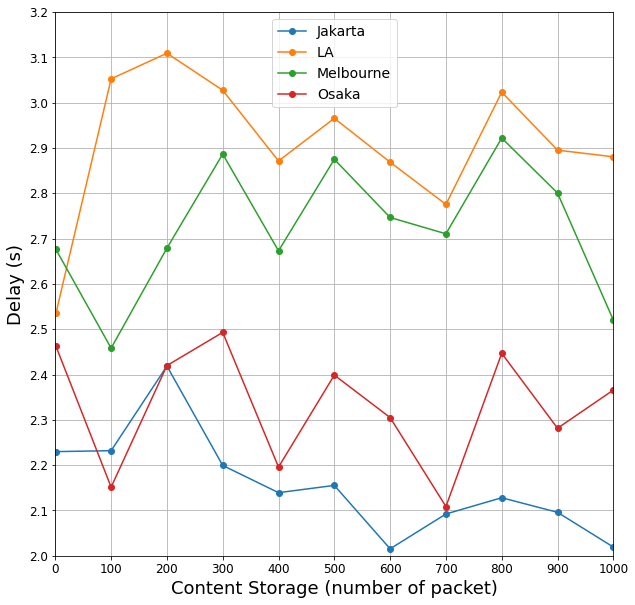

In [ ]:
a='cs_de'
name=a+'.png'
exec('x=df_'+a)

plt.figure(figsize=(10, 10))
plt.tick_params(labelsize=9)
for i in range (1, len(x.columns)):
  plt.plot(x.iloc[:,0], x.iloc[:,i], marker='o')
plt.legend((x.columns[1:len(x.columns)]).tolist(), fontsize=14)
plt.xlabel('Content Storage (number of packet)', fontsize=18)
plt.ylabel('Delay (s)', fontsize=18)

plt.xticks(np.arange(0, 1100, 100));  plt.xlim(0, 1000);   plt.tick_params(axis="x", labelsize=12);
plt.yticks(np.arange(2.0, 3.2, 0.1)); plt.ylim(2.0, 3.2);  plt.tick_params(axis="y", labelsize=12);
plt.grid()

if save:
  plt.savefig(name)
  zipObj.write(name)

x.corr().iloc[0:1,1:len(x.corr().columns)]

### Frek, Delay

,Jakarta,LA,Melbourne,Osaka
,,,,
Frek,0.976596,0.944468,0.927517,0.972835


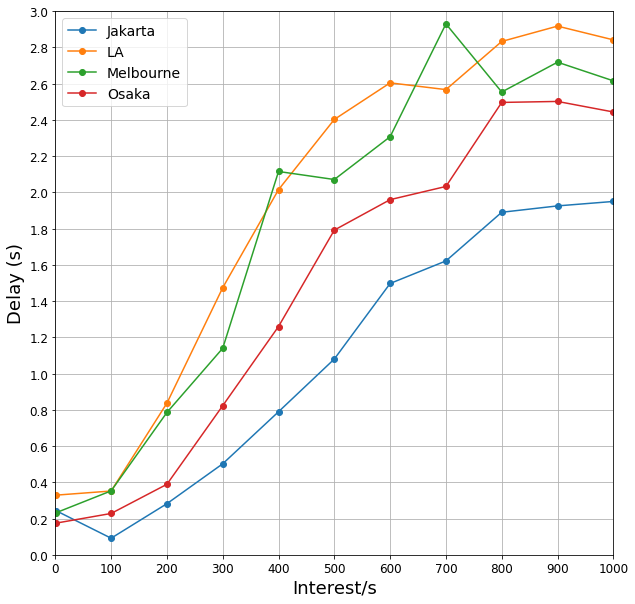

In [ ]:
a='frek_de'
name=a+'.png'
exec('x=df_'+a)

plt.figure(figsize=(10, 10))
plt.tick_params(labelsize=9)
for i in range (1, len(x.columns)):
  plt.plot(x.iloc[:,0], x.iloc[:,i], marker='o')
plt.legend((x.columns[1:len(x.columns)]).tolist(), fontsize=14)
plt.ylabel('Delay (s)', fontsize=18)
plt.xlabel('Interest/s', fontsize=18)

plt.xticks(np.arange(0, 1100, 100));  plt.xlim(0, 1000);  plt.tick_params(axis="x", labelsize=12);
plt.yticks(np.arange(0, 3.2, 0.2));   plt.ylim(0, 3); plt.tick_params(axis="y", labelsize=12);
plt.grid()

if save:
  plt.savefig(name)
  zipObj.write(name)

x.corr().iloc[0:1,1:len(x.corr().columns)]

### PS, Delay

,Jakarta,LA,Melbourne,Osaka
,,,,
PS,0.988027,0.975058,0.972377,0.986323


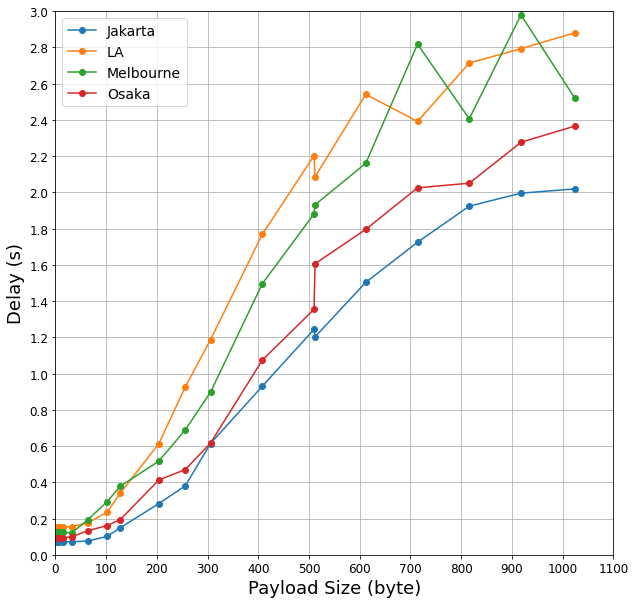

In [ ]:
a='ps_de'
name=a+'.png'
exec('x=df_'+a)

plt.figure(figsize=(10, 10))
plt.tick_params(labelsize=9)
for i in range (1, len(x.columns)):
  plt.plot(x.iloc[:,0], x.iloc[:,i], marker='o')
plt.legend((x.columns[1:len(x.columns)]).tolist(), fontsize=14)
plt.ylabel('Delay (s)', fontsize=18)
plt.xlabel('Payload Size (byte)', fontsize=18)

plt.xticks(np.arange(0, 1200, 100));  plt.xlim(0, 1100);  plt.tick_params(axis="x", labelsize=12);
plt.yticks(np.arange(0, 3.2, 0.2));   plt.ylim(0, 3);   plt.tick_params(axis="y", labelsize=12);
plt.grid()

if save:
  plt.savefig(name)
  zipObj.write(name)

x.corr().iloc[0:1,1:len(x.corr().columns)]


## Plot Packet Drop

### CS, Drop

,China,Hongkong,Singapore,Sydney,Tokyo
,,,,,
CS,-0.988647,0.974905,0.986364,0.419465,0.691963


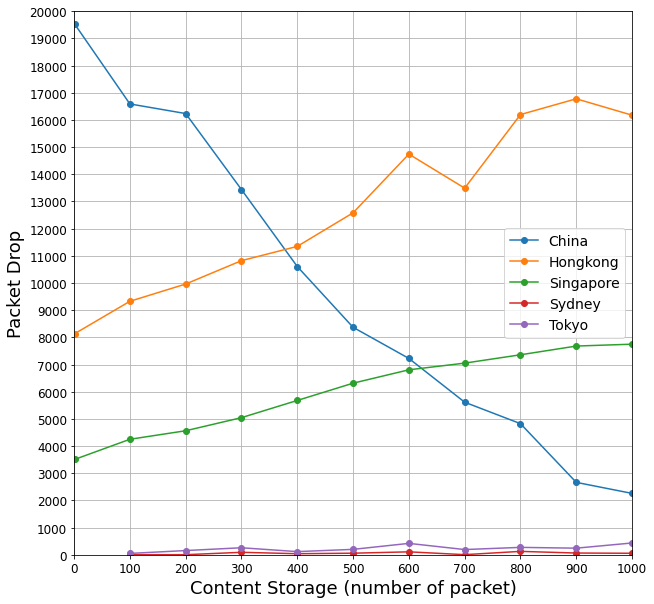

In [ ]:
a='cs_dr'
name=a+'.png'
exec('x=df_'+a)

plt.figure(figsize=(10, 10))
plt.tick_params(labelsize=9)
for i in range (1, len(x.columns)):
  plt.plot(x.iloc[:,0], x.iloc[:,i], marker='o')
plt.legend((x.columns[1:len(x.columns)]).tolist(), fontsize=14)
plt.ylabel('Packet Drop', fontsize=18)
plt.xlabel('Content Storage (number of packet)', fontsize=18)

plt.xticks(np.arange(0, 1100, 100));  plt.xlim(0, 1000);   plt.tick_params(axis="x", labelsize=12);
plt.yticks(np.arange(0, 21000, 1000)); plt.ylim(0, 20000);  plt.tick_params(axis="y", labelsize=12);
plt.grid()

if save:
  plt.savefig(name)
  zipObj.write(name)

x.corr().iloc[0:1,1:len(x.corr().columns)]

### Frek, Drop

,China,Hongkong,Singapore,Sydney,Tokyo
,,,,,
Frek,0.717737,0.99529,0.99557,0.652244,0.569113


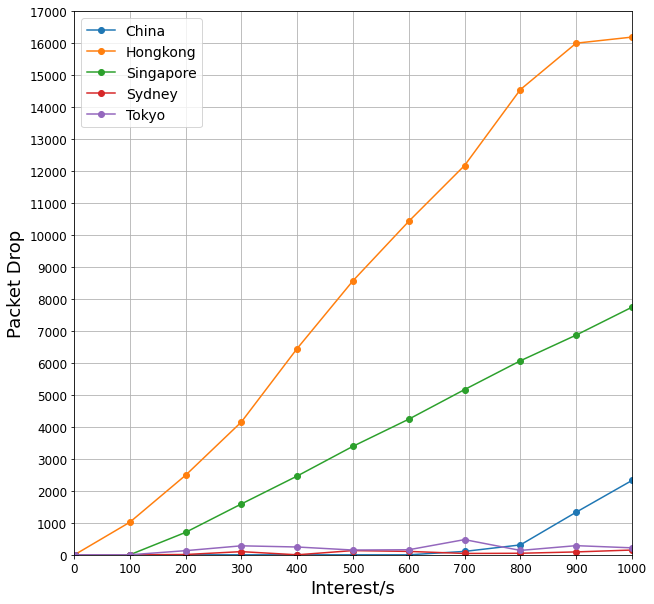

In [ ]:
a='frek_dr'
name=a+'.png'
exec('x=df_'+a)

plt.figure(figsize=(10, 10))
plt.tick_params(labelsize=9)
for i in range (1, len(x.columns)):
  plt.plot(x.iloc[:,0], x.iloc[:,i], marker='o')
plt.legend((x.columns[1:len(x.columns)]).tolist(), fontsize=14)
plt.ylabel('Packet Drop', fontsize=18)
plt.xlabel('Interest/s', fontsize=18)

plt.xticks(np.arange(0, 1100, 100));  plt.xlim(0, 1000);   plt.tick_params(axis="x", labelsize=12);
plt.yticks(np.arange(0, 20000, 1000)); plt.ylim(0, 17000);  plt.tick_params(axis="y", labelsize=12);
plt.grid()

if save:
  plt.savefig(name)
  zipObj.write(name)

x.corr().iloc[0:1,1:len(x.corr().columns)]

### Payload, Drop

,China,Hongkong,Singapore,Sydney,Tokyo
,,,,,
PS,0.844801,0.864823,0.909343,0.22899,0.168462


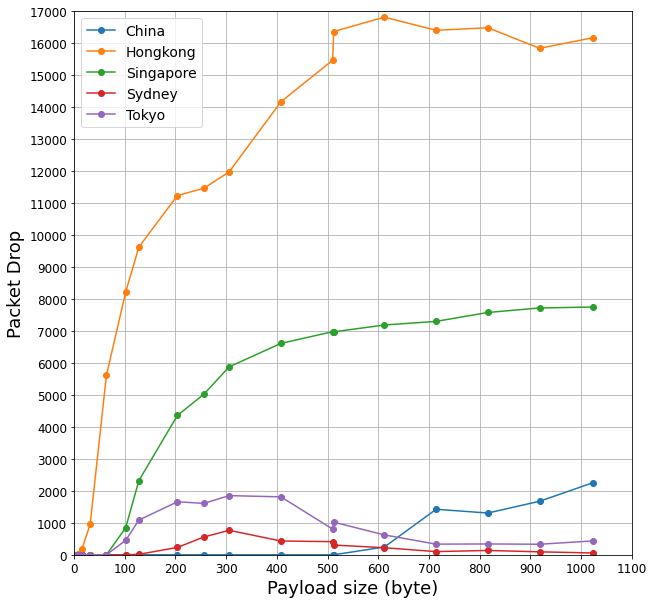

In [ ]:
a='ps_dr'
name=a+'.png'
exec('x=df_'+a)

plt.figure(figsize=(10, 10))
plt.tick_params(labelsize=9)
for i in range (1, len(x.columns)):
  plt.plot(x.iloc[:,0], x.iloc[:,i], marker='o')
plt.legend((x.columns[1:len(x.columns)]).tolist(), fontsize=14)
plt.ylabel('Packet Drop', fontsize=18)
plt.xlabel('Payload size (byte)', fontsize=18)

plt.xticks(np.arange(0, 1200, 100));  plt.xlim(0, 1100);  plt.tick_params(axis="x", labelsize=12);
plt.yticks(np.arange(0, 18000, 1000));   plt.ylim(0, 17000);   plt.tick_params(axis="y", labelsize=12);
plt.grid()

if save:
  plt.savefig(name)
  zipObj.write(name)

x.corr().iloc[0:1,1:len(x.corr().columns)]

## Plot Forward rate

### CS, Forward rate

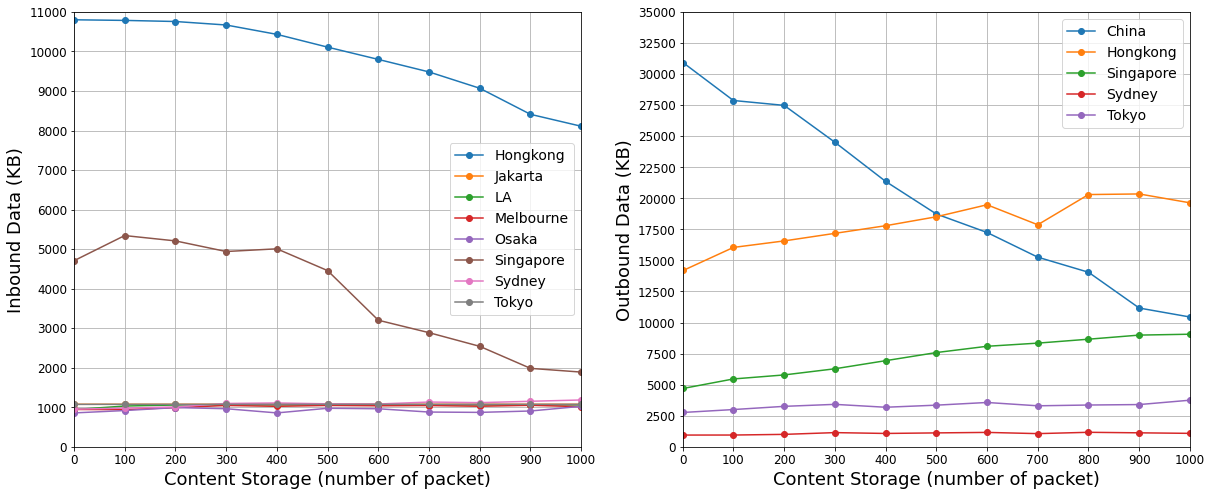

In [ ]:
a='cs_ra'
name=a+'.png'
exec('x=df_'+a+'0')

plt.figure(figsize=(20, 8))
plt.tick_params(labelsize=9)

plt.subplot(121)
exec('x=df_'+a+'0')
for i in range (1, len(x.columns)):
  plt.plot(x.iloc[:,0], x.iloc[:,i], marker='o')
plt.legend(x.columns[1:len(x.columns)].tolist(), fontsize=14)
plt.ylabel('Inbound Data (KB)', fontsize=18)
plt.xlabel('Content Storage (number of packet)', fontsize=18)

plt.xticks(np.arange(0, 1100, 100));  plt.xlim(0, 1000);  plt.tick_params(axis="x", labelsize=12);
plt.yticks(np.arange(0, 12000, 1000)); plt.ylim(0, 11000);  plt.tick_params(axis="y", labelsize=12);
plt.grid()

plt.subplot(122)
x=df_cs_ra1
for i in range (1, len(x.columns)):
  plt.plot(x.iloc[:,0], x.iloc[:,i], marker='o')
plt.legend(x.columns[1:len(x.columns)].tolist(), fontsize=14)
plt.ylabel('Outbound Data (KB)', fontsize=18)
plt.xlabel('Content Storage (number of packet)', fontsize=18)

plt.xticks(np.arange(0, 1100, 100));  plt.xlim(0, 1000);  plt.tick_params(axis="x", labelsize=12);
plt.yticks(np.arange(0, 40000, 2500)); plt.ylim(0, 35000);  plt.tick_params(axis="y", labelsize=12);
plt.grid()

if save:
  plt.savefig(name)
  zipObj.write(name)

In [ ]:
exec('x=df_'+a+'0')
x.corr().iloc[0:1,1:len(x.corr().columns)]

,Hongkong,Jakarta,LA,Melbourne,Osaka,Singapore,Sydney,Tokyo
,,,,,,,,
CS,-0.958533,0.22632,0.604757,0.68501,0.185244,-0.92952,0.92087,0.498685


In [ ]:
exec('x=df_'+a+'1')
x.corr().iloc[0:1,1:len(x.corr().columns)]

,China,Hongkong,Singapore,Sydney,Tokyo
,,,,,
CS,-0.994007,0.919361,0.986383,0.687744,0.799778


### Frek, Forward rate

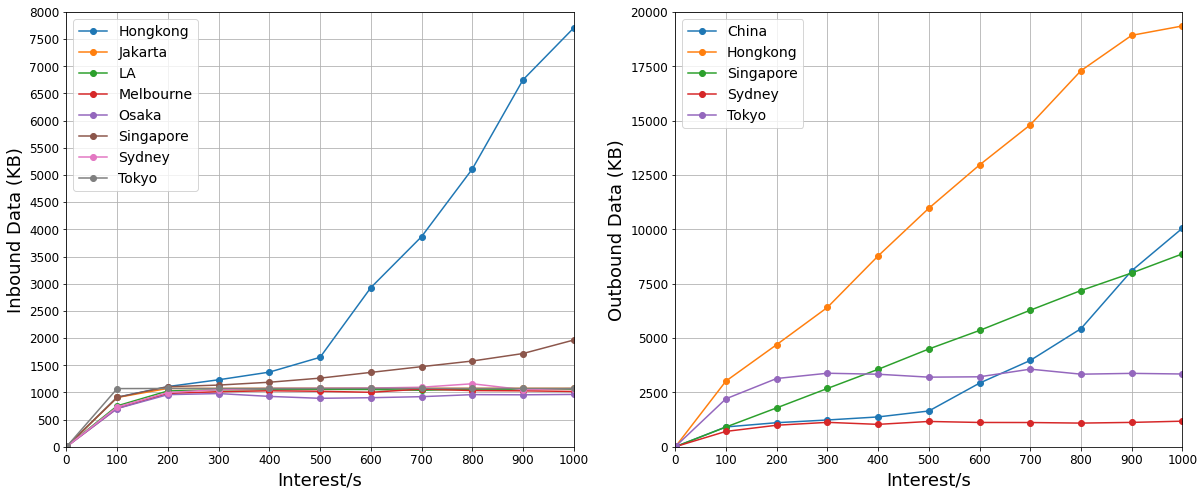

In [ ]:
a='frek_ra'
name=a+'.png'
exec('x=df_'+a+'0')

plt.figure(figsize=(20, 8))
plt.tick_params(labelsize=9)

plt.subplot(121)
exec('x=df_'+a+'0')
for i in range (1, len(x.columns)):
  plt.plot(x.iloc[:,0], x.iloc[:,i], marker='o')
plt.legend(x.columns[1:len(x.columns)].tolist(), fontsize=14)
plt.ylabel('Inbound Data (KB)', fontsize=18)
plt.xlabel('Interest/s', fontsize=18)

plt.xticks(np.arange(0, 1100, 100));  plt.xlim(0, 1000);  plt.tick_params(axis="x", labelsize=12);
plt.yticks(np.arange(0, 9000, 500)); plt.ylim(0, 8000);  plt.tick_params(axis="y", labelsize=12);
plt.grid()

plt.subplot(122)
exec('x=df_'+a+'1')
for i in range (1, len(x.columns)):
  plt.plot(x.iloc[:,0], x.iloc[:,i], marker='o')
plt.legend(x.columns[1:len(x.columns)].tolist(), fontsize=14)
plt.ylabel('Outbound Data (KB)', fontsize=18)
plt.xlabel('Interest/s', fontsize=18)

plt.xticks(np.arange(0, 1100, 100));  plt.xlim(0, 1000);  plt.tick_params(axis="x", labelsize=12);
plt.yticks(np.arange(0, 22500, 2500)); plt.ylim(0, 20000);  plt.tick_params(axis="y", labelsize=12);
plt.grid()

if save:
  plt.savefig(name)
  zipObj.write(name)

In [ ]:
exec('x=df_'+a+'0')
x.corr().iloc[0:1,1:len(x.corr().columns)]

,Hongkong,Jakarta,LA,Melbourne,Osaka,Singapore,Sydney,Tokyo
,,,,,,,,
Frek,0.947537,0.564999,0.620493,0.635467,0.598463,0.904511,0.655924,0.50132


In [ ]:
exec('x=df_'+a+'1')
x.corr().iloc[0:1,1:len(x.corr().columns)]

,China,Hongkong,Singapore,Sydney,Tokyo
,,,,,
Frek,0.917496,0.996547,0.999952,0.689585,0.651623


### Payload, Forward rate

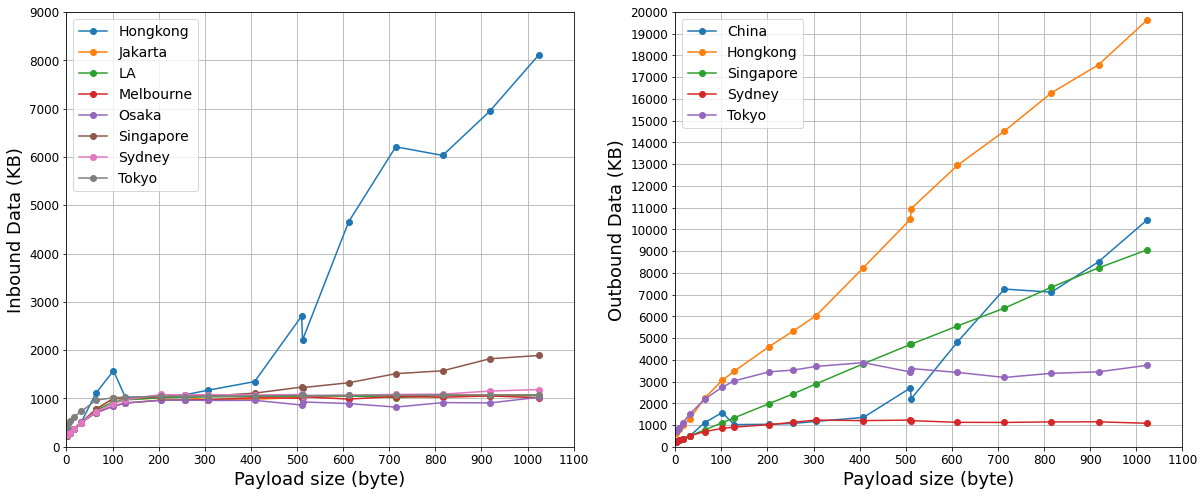

In [ ]:
a='ps_ra'
name=a+'.png'
exec('x=df_'+a+'0')

plt.figure(figsize=(20, 8))
plt.tick_params(labelsize=9)

plt.subplot(121)
exec('x=df_'+a+'0')
for i in range (1, len(x.columns)):
  plt.plot(x.iloc[:,0], x.iloc[:,i], marker='o')
plt.legend(x.columns[1:len(x.columns)].tolist(), fontsize=14)
plt.ylabel('Inbound Data (KB)', fontsize=18)
plt.xlabel('Payload size (byte)', fontsize=18)

plt.xticks(np.arange(0, 1200, 100));  plt.xlim(0, 1100);  plt.tick_params(axis="x", labelsize=12);
plt.yticks(np.arange(0, 10000, 1000));   plt.ylim(0, 9000);   plt.tick_params(axis="y", labelsize=12);
plt.grid()


plt.subplot(122)
exec('x=df_'+a+'1')
for i in range (1, len(x.columns)):
  plt.plot(x.iloc[:,0], x.iloc[:,i], marker='o')
plt.legend(x.columns[1:len(x.columns)].tolist(), fontsize=14)
plt.ylabel('Outbound Data (KB)', fontsize=18)
plt.xlabel('Payload size (byte)', fontsize=18)

plt.xticks(np.arange(0, 1200, 100));  plt.xlim(0, 1100);  plt.tick_params(axis="x", labelsize=12);
plt.yticks(np.arange(0, 21000, 1000));   plt.ylim(0, 20000);   plt.tick_params(axis="y", labelsize=12);
plt.grid()


if save:
  plt.savefig(name)
  zipObj.write(name)

In [ ]:
exec('x=df_'+a+'0')
x.corr().iloc[0:1,1:len(x.corr().columns)]

,Hongkong,Jakarta,LA,Melbourne,Osaka,Singapore,Sydney,Tokyo
,,,,,,,,
PS,0.954798,0.724529,0.719666,0.750647,0.675855,0.934078,0.761701,0.681831


In [ ]:
exec('x=df_'+a+'1')
x.corr().iloc[0:1,1:len(x.corr().columns)]

,China,Hongkong,Singapore,Sydney,Tokyo
,,,,,
PS,0.942651,0.99871,0.999955,0.742184,0.725221


## Download zip

In [ ]:
if save:
  zipObj.close()
  files.download('ndn.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from datetime import datetime

now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 00:41:57


# ETC

In [ ]:
df_ps_ra1

,PS,China,Hongkong,Singapore,Sydney,Tokyo
index,,,,,,
0,1,236.3427,655.1915,233.5478,234.2070,704.4671
1,2,245.1056,679.4902,242.2071,242.8905,730.5859
2,4,262.6307,728.0878,259.5255,260.2577,782.8241
3,8,297.6818,825.5489,294.1620,294.9923,887.3009
4,16,367.7423,996.3768,363.4356,364.5430,1096.2500
5,32,506.0039,1293.3554,501.9824,501.3027,1511.0390
6,64,1111.9176,2243.3349,778.8126,703.1386,2193.6825
7,102,1573.5000,3054.5860,1107.7130,843.6220,2740.3346
8,128,1019.6990,3475.8520,1334.1970,907.6584,3030.0215
